# Übungsaufgaben
In den folgenden Übungsaufgaben wollen wir einen Klassifikator trainieren, der die Beliebtheit von Filmen vorhersagt. Im Folgenden gilt ein Film als beliebt, wenn die durchschnittliche Zuschauerwertung $6.0$ überschreitet. Sie erhalten dazu einen Datensatz mit folgenden Spalten:

- `budget`: Das Budget des Films,
- `countries`: die Anzahl der an der Produktion beteiligten Länder,
- `runtime`: die Laufzeit des Films in Minuten,
- `cast_size`: die Anzahl der an der Produktion beteiligten Schauspieler,
- `crew_size`: die Anzahl der an der Produktion beteiligten Crewmitglieder und
- `cast_vote_avg`: die durchschnittliche Wertung sonstiger Produktionen der Schauspieler.

Beginnen Sie wie üblich mit dem Import der Algorithmen und Tests für dieses Übungsblatt.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Funktionen wie beispielsweise die Aufteilung in Trainings- und Testdaten sind randomisiert. Zur besseren Vergleichbarkeit wird der Zufallszahlengenerator mit einem festen Startwert initialisiert.

## Aufgabe 1
Laden Sie zuerst den Datensatz aus der Datei `classification_movies.csv`.

In [ ]:
df = pd.read_csv('classification_movies.csv')
df

Teilen Sie den Datensatz in Test- und Trainingsdaten. Wählen Sie ein Verhältnis von 3:1.

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.25)

## Aufgabe 2
Trainieren Sie einen k-Nächster-Nachbar-Klassifikator mit allen Spalten aus `df_train`. Als `X` dienen alle Spalten außer `popular`, während diese Spalte genau `y` beschreibt. Nutzen Sie die Implementierung aus `scikit-learn` und wählen Sie einen brauchbaren Wert für den Parameter `k`.

In [ ]:
X, y = df_train.drop('popular', axis=1), df_train['popular']
nn = KNeighborsClassifier(n_neighbors=4).fit(X, y)

Berechnen Sie anhand der Testdaten in `df_test` die Genauigkeit (`accuracy`). Verwenden Sie dafür ebenfalls die Funktion aus `scitkit-learn`.

In [ ]:
nn_accuracy = accuracy_score(df_test['popular'], nn.predict(df_test.drop('popular', axis=1)))
nn_accuracy

## Aufgabe 3
Erstellen Sie einen Entscheidungsbaum mit allen Spalten aus `df_train`. Als `X` dienen alle Spalten außer `popular`, während diese Spalte genau `y` beschreibt. Nutzen Sie die Implementierung aus `scikit-learn`.

In [ ]:
X, y = df_train.drop('popular', axis=1), df_train['popular']
tree = DecisionTreeClassifier().fit(X, y)

Berechnen Sie anhand der Testdaten in `df_test` die Genauigkeit (`accuracy`). Verwenden Sie dafür ebenfalls die Funktion aus `scitkit-learn`.

In [ ]:
tree_accuracy = accuracy_score(df_test['popular'], tree.predict(df_test.drop('popular', axis=1)))
tree_accuracy

## Aufgabe 4
Die folgende Zelle definiert einen neuen Film.

In [ ]:
df_new = pd.DataFrame({'budget': 14145774,
                       'countries': 2,
                       'runtime': 109,
                       'cast_size': 38,
                       'crew_size': 136,
                       'cast_vote_avg': 6.8}, index=[0])
df_new

Verwenden Sie beide Klassifikatoren und erstellen Sie jeweils eine Vorhersage, ob dieser Film überdurchschnittlich vom Publikum bewertet wird.

In [ ]:
nn_prediction = nn.predict(df_new)
tree_prediction = tree.predict(df_new)

nn_prediction, tree_prediction

## Aufgabe 5
Berechnen Sie *Precision* und *Recall* für beide Klassifikatoren. Interpretieren Sie die Ergebnisse.

In [ ]:
nn_precision = precision_score(df_test['popular'], nn.predict(df_test.drop('popular', axis=1)))
nn_recall = recall_score(df_test['popular'], nn.predict(df_test.drop('popular', axis=1)))
tree_precision = precision_score(df_test['popular'], tree.predict(df_test.drop('popular', axis=1)))
tree_recall = recall_score(df_test['popular'], tree.predict(df_test.drop('popular', axis=1)))

print(f'nn_precision   = {nn_precision}')
print(f'nn_recall      = {nn_recall}')
print(f'tree_precision = {tree_precision}')
print(f'tree_recall    = {tree_recall}')

## Hinweise zum Datensatz
Ein Teil der Ihnen zur Verfügung gestellten Daten wurden mit Hilfe der TMDb API erzeugt. Die Verwendung wird weder von TMDb unterstützt noch zertifiziert.

[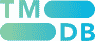](https://developers.themoviedb.org/3)